In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GRID_HEIGHT = 4
GRID_WIDTH = 12
TOTAL_ACTIONS = 4
ACTIONS = np.array([
    [1, 0], 
    [-1, 0], 
    [0, 1], 
    [0, -1], 
])
ACTION_LABELS = np.array(["D", "U", "R", "L"])
START_STATE = np.array([GRID_HEIGHT-1, 0])
TERMINAL_STATE = np.array([GRID_HEIGHT-1, GRID_WIDTH-1])

EPSILON = 0.1
GAMMA = 1.0
ALPHA = 0.5

In [3]:
def check_within_grid(s):
    if s[0] >= 0 and s[0] < GRID_HEIGHT and s[1] >= 0 and s[1] < GRID_WIDTH:
        return True
    return False

In [4]:
def check_within_cliff(s):
    if s[0] == GRID_HEIGHT-1 and s[1] >= 1 and s[1] < GRID_WIDTH-1:
        return True
    return False

In [5]:
def perform_action(s, a):
    a = ACTIONS[a]
    s_ = s+a
    if check_within_grid(s_):
        if check_within_cliff(s_):
            return START_STATE, -100
        return s_, -1
    return s, -1

In [6]:
def choose_action(s, q_value):
    if np.random.rand() <= EPSILON:
        return int(np.random.randint(4))
    else:
        values = q_value[s[0], s[1], :]
        max_value = np.max(values)
        actions = []
        for i, value in enumerate(values):
            if value == max_value:
                actions.append(i)
        return int(actions[np.random.randint(len(actions))])

In [7]:
def sarsa(q_value, gamma = GAMMA, alpha=ALPHA):
    s = START_STATE
    a = choose_action(s, q_value)
    rewards = 0.0
    while True:
        s_, r = perform_action(s, a)
        a_ = choose_action(s_, q_value)
        rewards += r
        q_value[s[0], s[1], a] += alpha * (r + gamma * q_value[s_[0], s_[1], a_] - q_value[s[0], s[1], a])
        s, a = s_, a_
        if np.all(s == TERMINAL_STATE):
            break
    return rewards

In [8]:
def q_learning(q_value, gamma = GAMMA, alpha=ALPHA):
    s = START_STATE
    rewards = 0.0
    while True:
        a = choose_action(s, q_value)
        s_, r = perform_action(s, a)
        rewards += r
        q_value[s[0], s[1], a] += alpha * (r + gamma * np.max(q_value[s_[0], s_[1], :]) - q_value[s[0], s[1], a])
        s = s_
        if np.all(s == TERMINAL_STATE):
            break
    return rewards

In [9]:
def run_algorithm(algorithm, runs, episodes):
    rewards = np.zeros((episodes))
    for i in range(runs):
        q_value = np.zeros((GRID_HEIGHT, GRID_WIDTH, TOTAL_ACTIONS))
        for j in range(episodes):
            rewards[j] += algorithm(q_value)
    return rewards / runs, q_value

In [10]:
def print_optimal_policy(q_value):
    optimal_policy = [["" for i in range(GRID_WIDTH)] for j in range(GRID_HEIGHT)]
    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            optimal_policy[i][j] = ACTION_LABELS[np.argmax(q_value[i, j, :])]
    optimal_policy[TERMINAL_STATE[0]][TERMINAL_STATE[1]] = "G"
    print(np.array(optimal_policy))

In [11]:
def generate_figure():

    rewards_sarsa, q_value_sarsa = run_algorithm(sarsa, 200, 500)
    rewards_q_learning, q_value_q_learning = run_algorithm(q_learning, 200, 500)

    plt.plot(rewards_sarsa, label='Sarsa')
    plt.plot(rewards_q_learning, label='Q-Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.ylim([-100, 0])
    plt.legend()

    plt.show()
    plt.close("all")
    
    print("Optimal Policy - SARSA")
    print_optimal_policy(q_value_sarsa)
    print()
    print("Optimal Policy - Q Learning")
    print_optimal_policy(q_value_q_learning)

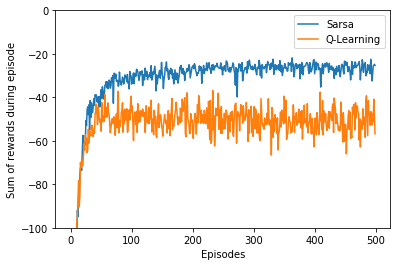

Optimal Policy - SARSA
[['R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'D' 'D']
 ['U' 'R' 'R' 'R' 'R' 'U' 'U' 'U' 'R' 'U' 'R' 'D']
 ['U' 'U' 'U' 'R' 'U' 'U' 'L' 'R' 'U' 'U' 'R' 'D']
 ['U' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'G']]

Optimal Policy - Q Learning
[['L' 'D' 'D' 'R' 'R' 'U' 'R' 'R' 'R' 'D' 'D' 'D']
 ['L' 'D' 'R' 'D' 'R' 'D' 'R' 'D' 'R' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D']
 ['U' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'G']]


In [12]:
generate_figure()